In [41]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<FONT COLOR="FF0000">The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</FONT>''')

vision
======

What is the sensitivity of the human eye to gray level differences ?
---------------------------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import ndimage
from os.path import join

from skimage.data import camera
from skimage.filter import rank as skr
from skimage.morphology import disk

def profile(ima,p0,p1,num):
    n = np.linspace(p0[0],p1[0],num)
    m = np.linspace(p0[1],p1[1],num)
    return [n,m,ima[m.astype(int),n.astype(int)]]

im = camera()[-1::-2,::2] 

#sampling points
p0 = np.array((10, 250))
p1 = np.array((73, 164))
n = 500
fig = plt.figure(0,figsize=[10,10])

#gray level quantization
sub = [1,3,5,7]

for p,s in enumerate(sub):
    n_gray = 256>>s

    q_im = (im.astype(np.int)>>s)<<s #cast to int to avoid overflow warning with << and >>

    plt.figure(0)
    plt.subplot(2,2,p)
    plt.imshow(q_im,interpolation='nearest',cmap=cm.gray,origin='lower',vmin=0,vmax=255)

    [x,y,p] = profile(q_im, p0, p1, n)
    plt.plot(x,y)
    plt.title('#level = %d'%n_gray)

    plt.gca().set_yticklabels([])
    plt.gca().set_xticklabels([])

    plt.figure(1)
    plt.plot(p,label='#level = %d'%n_gray)

plt.figure(1)
plt.legend(loc=3)
plt.show()

ImportError: libpng15.so.15: cannot open shared object file: No such file or directory

What is the sensitivity of the human eye to spatial resolution ?
-----------------------------------------------------------------

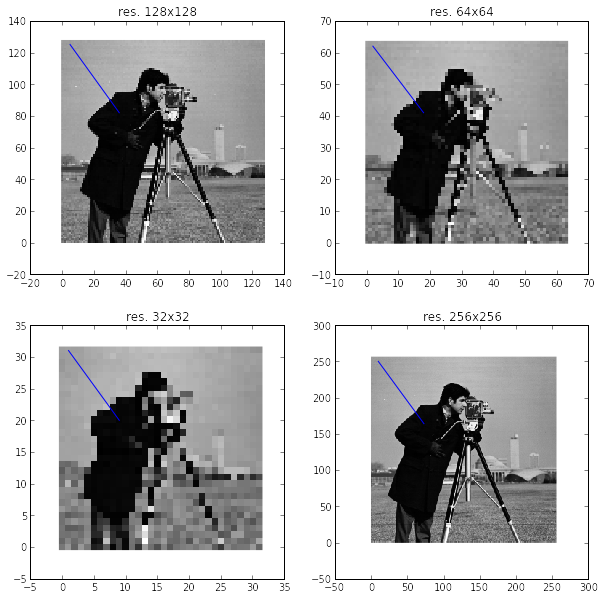

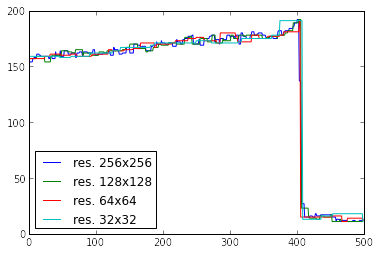

In [38]:
fig = plt.figure(0,figsize=[10,10])

#resolution
n_res = [256,128,64,32]
for p,res in enumerate(n_res):
    step = 256/res
    q_im = im[::step,::step]

    plt.figure(0)
    plt.subplot(2,2,p)
    plt.imshow(q_im,interpolation='nearest',cmap=cm.gray,origin='lower')
    [x,y,p] = profile(q_im, p0/step, p1/step, n)
    plt.plot(x,y)
    plt.title('res. %dx%d'%(res,res))

    plt.figure(1)
    plt.plot(p,label='res. %dx%d'%(res,res))

plt.legend(loc=3)
plt.show()

What is the difference between a sharp and a smooth border ?
------------------------------------------------------------

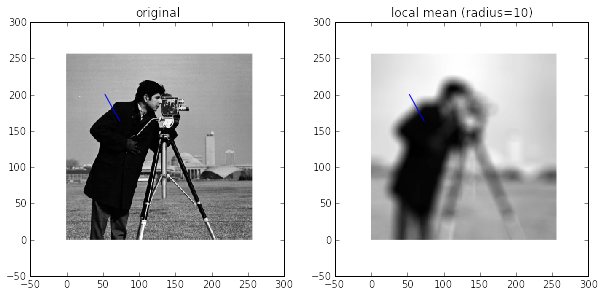

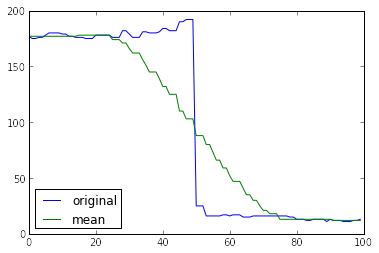

In [39]:
#filtered version
radius = 10
mean = skr.mean(im,disk(radius))

#profiles
p0 = (53, 200)
p1 = (73, 164)
n = 100

[x,y,p] = profile(im, p0, p1, n)
[x,y,pm] = profile(mean, p0, p1, n)

fig = plt.figure(0,figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('original')
plt.plot(x,y)
plt.subplot(1,2,2)
plt.imshow(mean,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.title('local mean (radius=%d)'%radius)
plt.plot(x,y)

fig = plt.figure(1)
plt.plot(p,label='original')
plt.plot(pm,label='mean')
plt.legend(loc=3)
plt.show()